<a href="https://colab.research.google.com/github/NadineNjora/-AI-Coursework-2025/blob/main/Pokemon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Make plots look nice
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
sns.set()


In [23]:
import pandas as pd

dataset_choice = "Pokemon"

# Dictionary mapping dataset names to raw GitHub links
urls = {

    "Pokemon":  "https://github.com/YBIFoundation/Dataset/raw/main/Pokemon.csv",

}
# Load chosen dataset
url = urls[dataset_choice]
print(f"Loading dataset: {dataset_choice}")
df = pd.read_csv(url)

# Show dataset shape and preview
print("Shape:", df.shape)
df.head()

Loading dataset: Pokemon
Shape: (800, 12)


,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [24]:


print("Column names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Summary stats
df.describe(include='all').transpose().head(10)


Column names: ['SN', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Generation', 'Legendary']

Data types:
 SN              int64
Name           object
Type 1         object
Type 2         object
HP              int64
Attack          int64
Defense         int64
Sp. Attack      int64
Sp. Defense     int64
Speed           int64
Generation      int64
Legendary        bool
dtype: object

Missing values:
 SN               0
Name             0
Type 1           0
Type 2         386
HP               0
Attack           0
Defense          0
Sp. Attack       0
Sp. Defense      0
Speed            0
Generation       0
Legendary        0
dtype: int64

Duplicate rows: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SN,800.0,NaN,NaN,NaN,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Name,800,800,PumpkabooSuper Size,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type 1,800,18,Water,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type 2,414,18,Flying,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,800.0,NaN,NaN,NaN,69.25875,25.534669,1.0,50.0,65.0,80.0,255.0
Attack,800.0,NaN,NaN,NaN,79.00125,32.457366,5.0,55.0,75.0,100.0,190.0
Defense,800.0,NaN,NaN,NaN,73.8425,31.183501,5.0,50.0,70.0,90.0,230.0
Sp. Attack,800.0,NaN,NaN,NaN,72.82,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Defense,800.0,NaN,NaN,NaN,71.9025,27.828916,20.0,50.0,70.0,90.0,230.0
Speed,800.0,NaN,NaN,NaN,68.2775,29.060474,5.0,45.0,65.0,90.0,180.0


In [25]:
# ===========================================
# Step 5 - Explore Pokémon Dataset Structure
# ===========================================

print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Show first few rows again
display(df.head())

# Quick overview of numeric columns
df.describe().T


Dataset Shape: (800, 12)

Columns:
 ['SN', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Generation', 'Legendary']


,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,count,mean,std,min,25%,50%,75%,max
SN,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Attack,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Defense,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [26]:
# Drop only if they exist
for col in ['#', 'Name']:
    if col in df.columns:
        df = df.drop(col, axis=1)

# Continue cleaning
df['Type 2'] = df['Type 2'].fillna('None')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type 1'] = le.fit_transform(df['Type 1'])
df['Type 2'] = le.fit_transform(df['Type 2'])
df['Legendary'] = df['Legendary'].astype(int)

df.head()


,SN,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,9,14,45,49,49,65,65,45,1,0
1,2,9,14,60,62,63,80,80,60,1,0
2,3,9,14,80,82,83,100,100,80,1,0
3,3,9,14,80,100,123,122,120,80,1,0
4,4,6,12,39,52,43,60,50,65,1,0


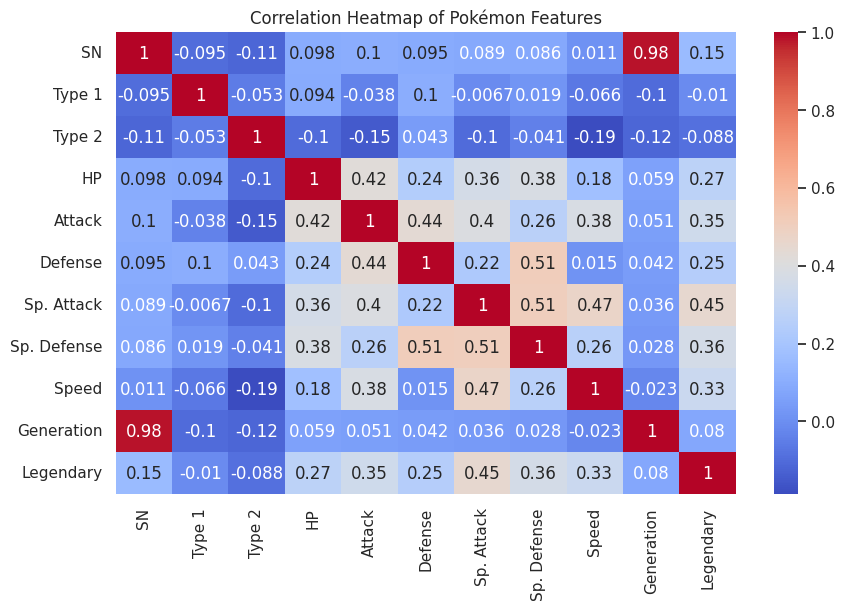

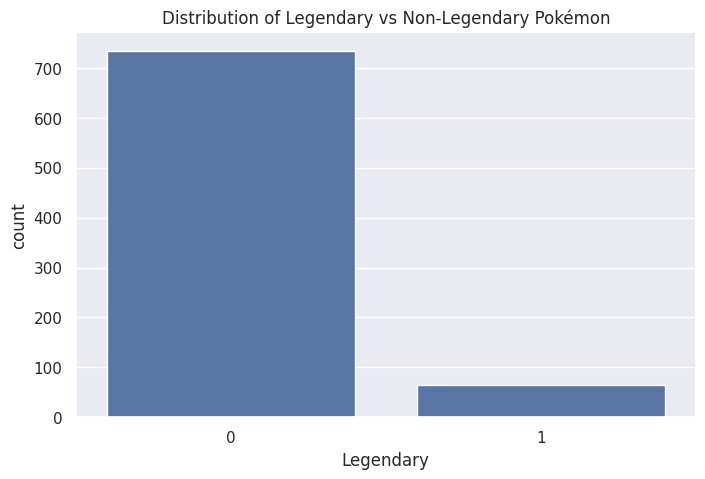

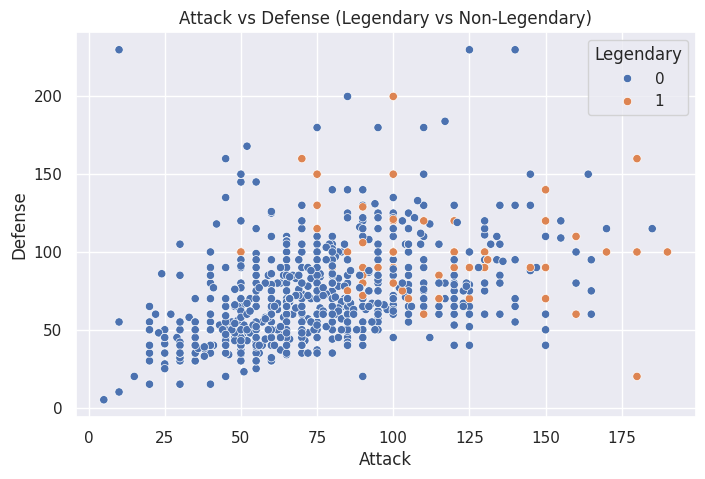

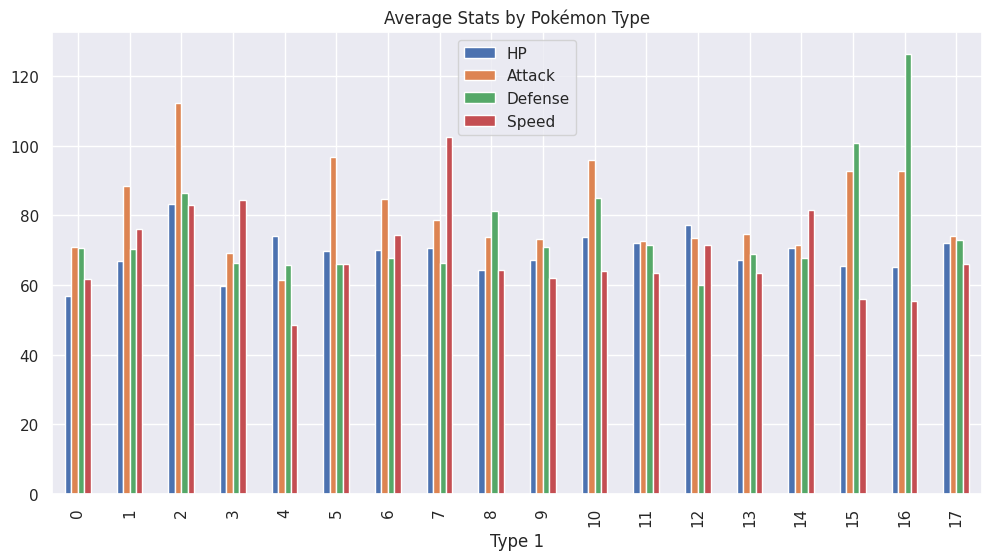

In [27]:
# ===========================================
# Step 7 - Exploratory Data Analysis
# ===========================================

# 1️⃣ Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Pokémon Features")
plt.show()

# 2️⃣ Distribution of target (Legendary vs Non-Legendary)
sns.countplot(x='Legendary', data=df)
plt.title("Distribution of Legendary vs Non-Legendary Pokémon")
plt.show()

# 3️⃣ Relationship: Attack vs Defense, colored by Legendary
sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=df)
plt.title("Attack vs Defense (Legendary vs Non-Legendary)")
plt.show()

# 4️⃣ Average stats per Type 1
avg_stats = df.groupby('Type 1')[['HP','Attack','Defense','Speed']].mean()
avg_stats.plot(kind='bar', figsize=(12,6))
plt.title("Average Stats by Pokémon Type")
plt.show()


In [28]:
### EDA Insights====================
#1. Legendary Pokémon have higher Attack and Defense values than non-Legendary ones.
#2. Certain types (e.g., Dragon, Psychic) have higher average stats.
#3. Strong correlation between Total and each base stat.
#4. Type 1 and Type 2 together might influence a Pokémon’s likelihood of being Legendary.


In [29]:
# ===========================================
# Step 8 - Feature and Target Selection
# ===========================================

X = df[['Attack', 'Defense']]   # Features
y = df['Legendary']             # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


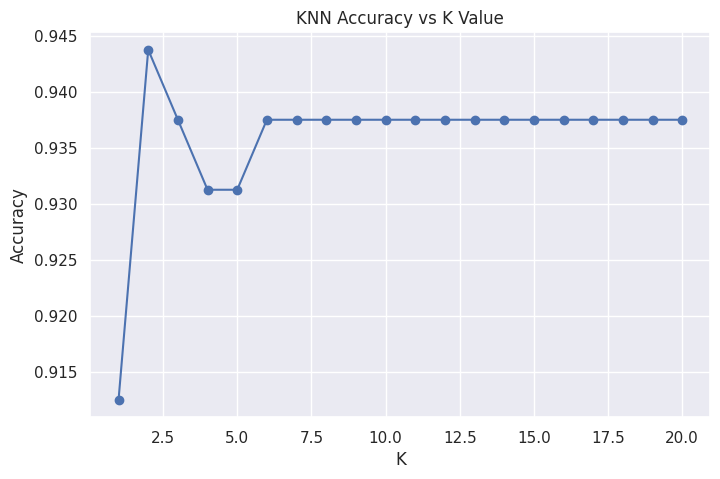

✅ Optimal K = 2
KNN Accuracy: 0.94375


In [30]:
# ===========================================
# Step 9 - KNN Model (Lazy Learner)
# ===========================================

accuracy = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.plot(range(1,21), accuracy, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

optimal_k = accuracy.index(max(accuracy)) + 1
print(f"✅ Optimal K = {optimal_k}")

# Final model with best K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


In [31]:
# ===========================================
# Step 10 - Decision Tree Model
# ===========================================

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9125


In [32]:
# ===========================================
# Step 11 - Tuned Decision Tree (Hyperparameter Optimization)
# ===========================================

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

best_dt = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Tuned Decision Tree Accuracy:", best_dt.score(X_test, y_test))


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.94375



KNN Results:
Accuracy: 0.94375
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       150
           1       1.00      0.10      0.18        10

    accuracy                           0.94       160
   macro avg       0.97      0.55      0.58       160
weighted avg       0.95      0.94      0.92       160



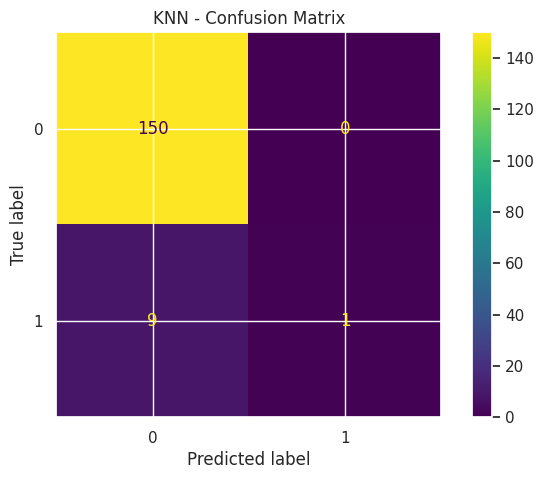


Decision Tree Results:
Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       150
           1       0.25      0.20      0.22        10

    accuracy                           0.91       160
   macro avg       0.60      0.58      0.59       160
weighted avg       0.90      0.91      0.91       160



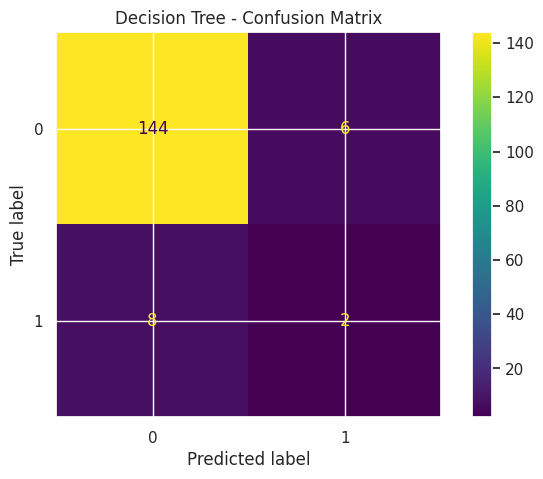


Tuned Decision Tree Results:
Accuracy: 0.94375
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.67      0.20      0.31        10

    accuracy                           0.94       160
   macro avg       0.81      0.60      0.64       160
weighted avg       0.93      0.94      0.93       160



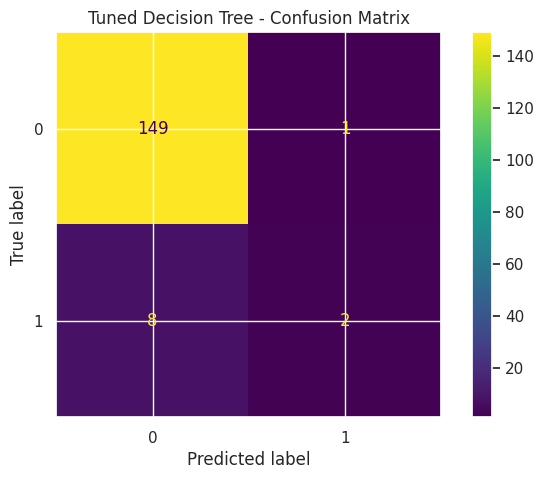

In [33]:
# ===========================================
# Step 12 - Model Evaluation
# ===========================================

models = {'KNN': knn, 'Decision Tree': dt, 'Tuned Decision Tree': best_dt}

for name, model in models.items():
    print(f"\n{name} Results:")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
